## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Descubrimiento de grupos en los datos

---

En esta libreta se generan los modelos de clusterización sobre el dataset final del escenario para su posterior evaluación y análisis. Se utilizará como herramienta de soporte a mlflow para el registro completo de la experimentación. 

---

In [22]:
# Importación de librerías

import pandas as pd
# Se importa mlflow para registro de la experimentación 
import mlflow
# Se importan los métodos a utilizar para clusterizar
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
# Otras opciones: DBSCAN, MeanShift, BisectingKMeans

# Se importan las métricas a utilizar para evaluar el proceso
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mlflow.models.signature import infer_signature

----

##### Lectura del dataset

In [23]:
df = pd.read_csv("../../../data/final/datos_finales_clusterizacion.csv", sep=";")
df.head(5)

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,nivel_tarjeta_Blue,nivel_tarjeta_Gold,nivel_tarjeta_Platinum,nivel_tarjeta_Silver
0,22,35000,3,123.0,59000,0.59,16.02,1,36.0,1088.0,...,False,False,False,False,True,False,True,False,False,False
1,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,False,False,False,True,False,False,True,False,False,False
2,25,5500,3,1.0,9600,0.57,12.87,1,44.0,1291.0,...,False,False,False,False,True,False,True,False,False,False
3,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,False,False,False,False,True,False,True,False,False,False
4,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,True,False,False,False,False,False,True,False,False,False


In [24]:
# Transformación por las características de mlflow para la detección de nulos en campos de tipo integer
df = df.astype({col: 'float64' for col in df.select_dtypes(include='int').columns})

----

##### Configuración de la experimentación

In [26]:
# Se genera el experimento en mlflow
exp_name = 'Experimentación clustering #600 (SP7)'
exp_id = mlflow.create_experiment(name=exp_name)

In [27]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=2"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=2)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    input_example = df.iloc[0].to_frame().T
    signature = infer_signature(df, cluster_labels)
    mlflow.sklearn.log_model(trained_model, "Kmeans_K2", input_example=input_example, signature=signature)

    # Se finaliza el registro
    mlflow.end_run()

Para contabilizar los elementos por cluster se utilizan las labels generadas

In [28]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k2 = df.copy()
# Se agregan las labels generadas
df_kmeans_k2['cluster'] = cluster_labels
df_kmeans_k2['cluster'].value_counts()

cluster
0    8296
1     603
Name: count, dtype: int64

Se hace la exportación de los resultados a un archivo .csv nuevo

In [29]:
df_kmeans_k2.to_csv("../../../data/final/df_kms_k2.csv", sep=";", index=False)

Se pasa a probar otro método (clustering jerárquico)

In [30]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="AGClustering - K=2"):
    # Selección y configuración de la técnica
    modelo_clusters = AgglomerativeClustering(n_clusters=2)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    # input_example = df.iloc[0].to_frame().T
    signature = infer_signature(df, cluster_labels)
    mlflow.sklearn.log_model(trained_model, "AGC_2", signature=signature)

    # Se finaliza el registro
    mlflow.end_run()

2025/05/14 23:05:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Para contabilizar los elementos por cluster se utilizan las labels generadas

In [31]:
# Se preserva el conjunto de datos original para evitar problemas
df_agc_k2 = df.copy()
# Se agregan las labels generadas
df_agc_k2['cluster'] = cluster_labels
df_agc_k2['cluster'].value_counts()

cluster
0    8528
1     371
Name: count, dtype: int64

Se realiza la exportación de los resultados

In [32]:
df_agc_k2.to_csv("../../../data/final/df_agc_k2.csv", sep=";", index=False)

In [33]:
# Imprimir métricas obtenidas
print("\n Métricas del modelo Agglomerative Clustering:")
print(f"- Silhouette Score: {score_s}")
print(f"- Davies-Bouldin Score: {score_db}")
print(f"- Calinski-Harabasz Score: {score_ch}")


 Métricas del modelo Agglomerative Clustering:
- Silhouette Score: 0.7375644813485742
- Davies-Bouldin Score: 0.5475043474299713
- Calinski-Harabasz Score: 7769.983437109899


Prueba con otro método paramétrico

In [35]:
with mlflow.start_run(experiment_id=exp_id, run_name="Birch - K = 2"):
    modelo_clusters = Birch(n_clusters=2)
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Calcular métricas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Registrar métricas
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Guardar el modelo
    signature = infer_signature(df, cluster_labels)
    mlflow.sklearn.log_model(trained_model, "Birch_Model", signature=signature)

    mlflow.end_run()

In [36]:
# Se preserva el conjunto de datos original para evitar problemas
df_bc = df.copy()
# Se agregan las labels generadas
df_bc['cluster'] = cluster_labels
df_bc['cluster'].value_counts()

cluster
0    8528
1     371
Name: count, dtype: int64

In [37]:
print("\n Métricas del modelo Birch Clustering:")
print(f"- Silhouette Score: {score_s}")
print(f"- Davies-Bouldin Score: {score_db}")
print(f"- Calinski-Harabasz Score: {score_ch}")



 Métricas del modelo Birch Clustering:
- Silhouette Score: 0.7375644813485742
- Davies-Bouldin Score: 0.5475043474299713
- Calinski-Harabasz Score: 7769.983437109899


Se prueba con Kmeans pero con K = 3

Para contabilizar los elementos por cluster se utilizan las labels generadas

In [38]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=3"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=3)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 3)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    input_example = df.iloc[0].to_frame().T
    signature = infer_signature(df, cluster_labels)
    mlflow.sklearn.log_model(trained_model, "Kmeans_K3", input_example=input_example, signature=signature)

    # Se finaliza el registro
    mlflow.end_run()

In [39]:
# Se preserva el conjunto de datos original para evitar problemas
df_kms_k3 = df.copy()
# Se agregan las labels generadas
df_kms_k3['cluster'] = cluster_labels
df_kms_k3['cluster'].value_counts()

cluster
0    4709
2    3884
1     306
Name: count, dtype: int64

In [40]:
print("\n Métricas del modelo k-means k=3:")
print(f"- Silhouette Score: {score_s}")
print(f"- Davies-Bouldin Score: {score_db}")
print(f"- Calinski-Harabasz Score: {score_ch}")



 Métricas del modelo k-means k=3:
- Silhouette Score: 0.3909464753782873
- Davies-Bouldin Score: 0.8289088122348759
- Calinski-Harabasz Score: 8828.658690282275


### Opciones de optimización del proceso

Utilizar PCA (solo para visualización de clusters) y un proceso de normalización de valores para eliminar el impacto de las diferencias en el dataset en la clusterización.

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalización de los datos
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(df)

# Aplicación de PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalizado)

# Clusterización con las diferentes técnicas

In [43]:
# Se genera el experimento en mlflow
exp_name = 'Experimentación clustering #200000'
exp_id = mlflow.create_experiment(name=exp_name)

In [44]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans N - K=2"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=2)
    
    trained_model = modelo_clusters.fit(df_normalizado)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df_normalizado, cluster_labels)
    score_db = davies_bouldin_score(df_normalizado, cluster_labels)
    score_ch = calinski_harabasz_score(df_normalizado, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    # input_example = df_normalizado.iloc[0].to_frame().T
    signature = infer_signature(df_normalizado, cluster_labels)
    mlflow.sklearn.log_model(trained_model, "Kmeans_K2_N", input_example=input_example, signature=signature)

    # Se finaliza el registro
    mlflow.end_run()

In [46]:
# Se preserva el conjunto de datos original para evitar problemas
# Convertir df_normalizado a un DataFrame de pandas
df_kms_k2_n = pd.DataFrame(df_normalizado, columns=df.columns)

# Se agregan las labels generadas
df_kms_k2_n['cluster'] = cluster_labels

# Contar los elementos por cluster
df_kms_k2_n['cluster'].value_counts()

cluster
1    6867
0    2032
Name: count, dtype: int64

In [47]:
print("\n Métricas Kmeans N - K=2:")
print(f"- Silhouette Score: {score_s}")
print(f"- Davies-Bouldin Score: {score_db}")
print(f"- Calinski-Harabasz Score: {score_ch}")


 Métricas Kmeans N - K=2:
- Silhouette Score: 0.11683614667158806
- Davies-Bouldin Score: 2.951778049826245
- Calinski-Harabasz Score: 692.9623545652238


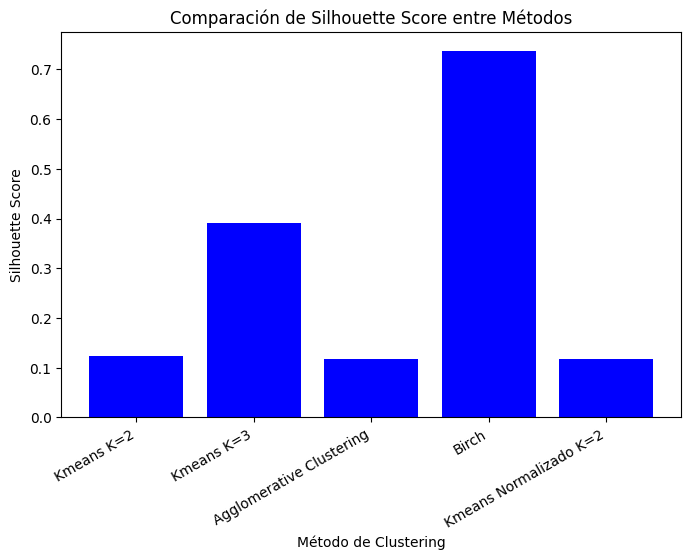

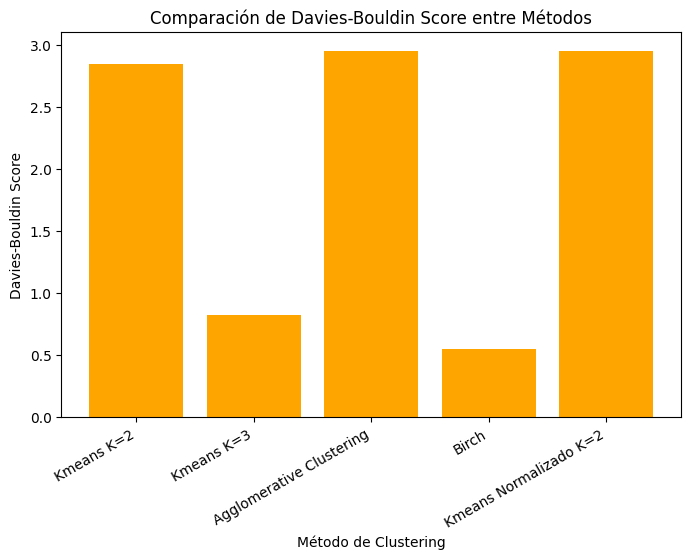

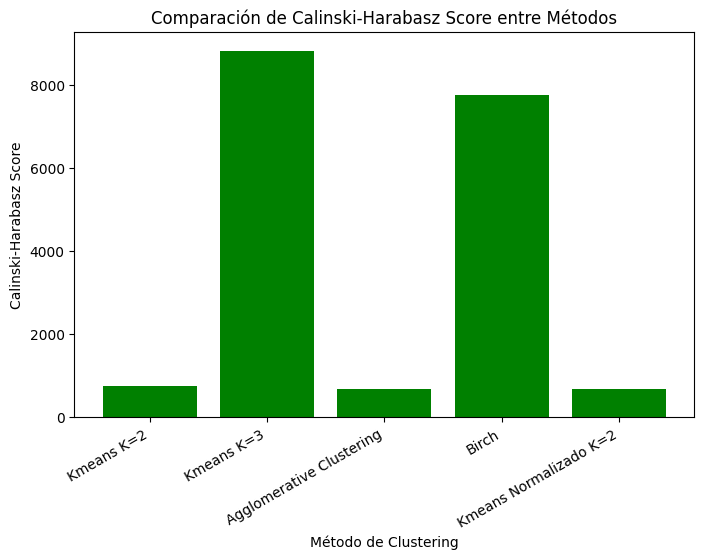

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Métodos de clustering evaluados
methods = [
    'Kmeans K=2', 'Kmeans K=3', 'Agglomerative Clustering', 
    'Birch', 'Kmeans Normalizado K=2'
]

# Métricas obtenidas
silhouette_scores = [0.124, 0.3909, 0.1168, 0.7376, 0.1168]
davies_bouldin_scores = [2.8499, 0.8289, 2.9523, 0.5475, 2.9518]
calinski_harabasz_scores = [769.6354, 8828.6587, 692.9631, 7769.9834, 692.9623]

# Gráfico Silhouette Score
plt.figure(figsize=(8, 5))
plt.bar(methods, silhouette_scores, color='blue')
plt.xlabel('Método de Clustering')
plt.ylabel('Silhouette Score')
plt.title('Comparación de Silhouette Score entre Métodos')
plt.xticks(rotation=30, ha="right")
plt.show()

# Gráfico Davies-Bouldin Score
plt.figure(figsize=(8, 5))
plt.bar(methods, davies_bouldin_scores, color='orange')
plt.xlabel('Método de Clustering')
plt.ylabel('Davies-Bouldin Score')
plt.title('Comparación de Davies-Bouldin Score entre Métodos')
plt.xticks(rotation=30, ha="right")
plt.show()

# Gráfico Calinski-Harabasz Score
plt.figure(figsize=(8, 5))
plt.bar(methods, calinski_harabasz_scores, color='green')
plt.xlabel('Método de Clustering')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Comparación de Calinski-Harabasz Score entre Métodos')
plt.xticks(rotation=30, ha="right")
plt.show()

